# Trabalho Prático 1
**Grupo 22**

Alexis Correia - A102495 <br>
João Fonseca - A102512


## Exercício 2
Um sistema de tráfego  é representado por um grafo orientado ligado. Os nodos denotam pontos de acesso e  os arcos denotam vias de comunicação só com um sentido .  O grafo tem de ser ligado: entre cada par de nodos  $(n_1,n_2)$ tem de existir um caminho $n_1 -> n_2$ e um caminho $n_2 -> n_1$.

1. Gerar aleatoriamente o grafo com  $N \in \{6..10\}$  nodos e com ramos verificando:
    1. Cada nodo tem um número aleatório de descendentes $d \in \{0..3\}$, cujos destinos são também gerados aleatoriamente.
    2. Se  existirem **“loops”**  ou destinos repetidos, deve-se gerar outro grafo.
    
2. Pretende-se fazer  manutenção interrompendo  determinadas vias. Determinar o maior número de vias que é possível remover mantendo o grafo ligado.

In [4]:
#Inicialização

import networkx as nx
import random
from ortools.linear_solver import pywraplp

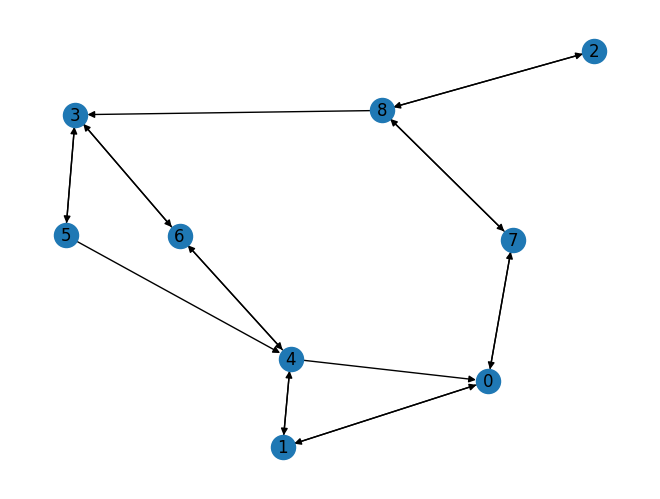

In [5]:
random.seed(None)

def cria_adj(N):
    adj = {n: [] for n in range(N)}
    nodes = list(range(N))
    random.shuffle(nodes)
    
    for i in range(N - 1):
        adj[nodes[i]].append(nodes[i + 1])
        adj[nodes[i + 1]].append(nodes[i])

    for n in range(N):
        num_arestas = random.randint(0, 1)
        for _ in range(num_arestas):
            d = random.randint(0, N - 1)
            if d != n and d not in adj[n]:
                adj[n].append(d)
    
    for n in adj:
        adj[n] = sorted(list(set(adj[n])))  #sorted?
    
    return adj

N = 9
adj = cria_adj(N)

def converte(adj):
    graph = nx.DiGraph()
    for n in adj.keys():
        graph.add_node(n)
        for i in adj[n]:
            graph.add_edge(n, i)
    return graph

G = converte(adj)
nx.draw(G, with_labels=True)

Com o grafo criado de forma aleatória, podemos começar a utilizar a programação inteira para determinar quantas arestas do grafo podemos retirar de forma que o grafo permaneça ligado.

In [17]:
solver = pywraplp.Solver.CreateSolver('SCIP')

O=D=N
X={}
for o in range(O):
    for d in range(D):
        X[o,d] = solver.BoolVar(f"X[{o},{d}]")

#R1
for o in range(O):
    for d in range(D):
        if d not in adj[o]:
            solver.Add(X[o,d] == 0)

#R2 & 4
for o in range(O):
    solver.Add(sum([X[o,d] for d in range(D)])>=1)
    solver.Add(sum([X[o,d] for d in range(D)])<=2)

#R3 & 5
for d in range(D):
    solver.Add(sum([X[o,d] for o in range(O)])>=1)
    solver.Add(sum([X[o,d] for o in range(O)])<=2)

status = solver.Solve()
if status == pywraplp.Solver.OPTIMAL:
    print("X", end=" | ")
    for d in range(N):
        print(d, end = " | ")
    print()
    aux = 0
    for o in range(N):
        ed = []
        print(o, end = " | ")
        for d in range(N):
            if X[o,d].solution_value() == 1:
                print("1", end = " | ")
                aux += 1
                ed.append((o,d))
            else:
                print("0", end = " | ")
        print(ed)
    print("Início:", G.number_of_edges(), "arestas")
    print(f"Fim: {aux} arestas")
    #print(f"Resposta: Podemos retirar {G.number_of_edges()-aux} arestas")
else:
    print("ELSE")
#print(adj)

X | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 
0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | [(0, 1), (0, 7)]
1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | [(1, 0)]
2 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | [(2, 8)]
3 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | [(3, 5), (3, 6)]
4 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | [(4, 1)]
5 | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | [(5, 3)]
6 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 | 0 | [(6, 3), (6, 4)]
7 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | [(7, 8)]
8 | 0 | 0 | 1 | 0 | 0 | 0 | 0 | 1 | 0 | [(8, 2), (8, 7)]
Início: 19 arestas
Fim: 13 arestas
